In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, plot_confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = "../data/raw/heart.csv"

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exr_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exr_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exr_induced_angina',\
            'st_slope', 'num_major_vessels', 'thalassemia']

num_cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression']

## Numerical Feature

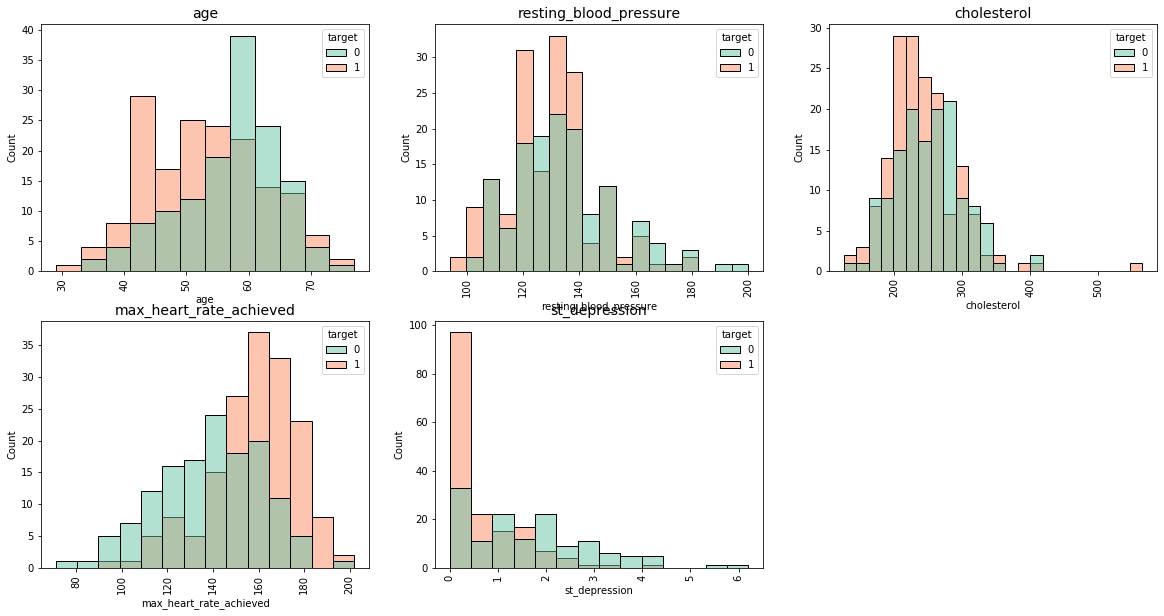

In [13]:
sns.set_palette("pastel")
plt.figure(figsize=(20,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.histplot(data = df, x = col, hue = 'target', palette = 'Set2')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

## Categorical Feature

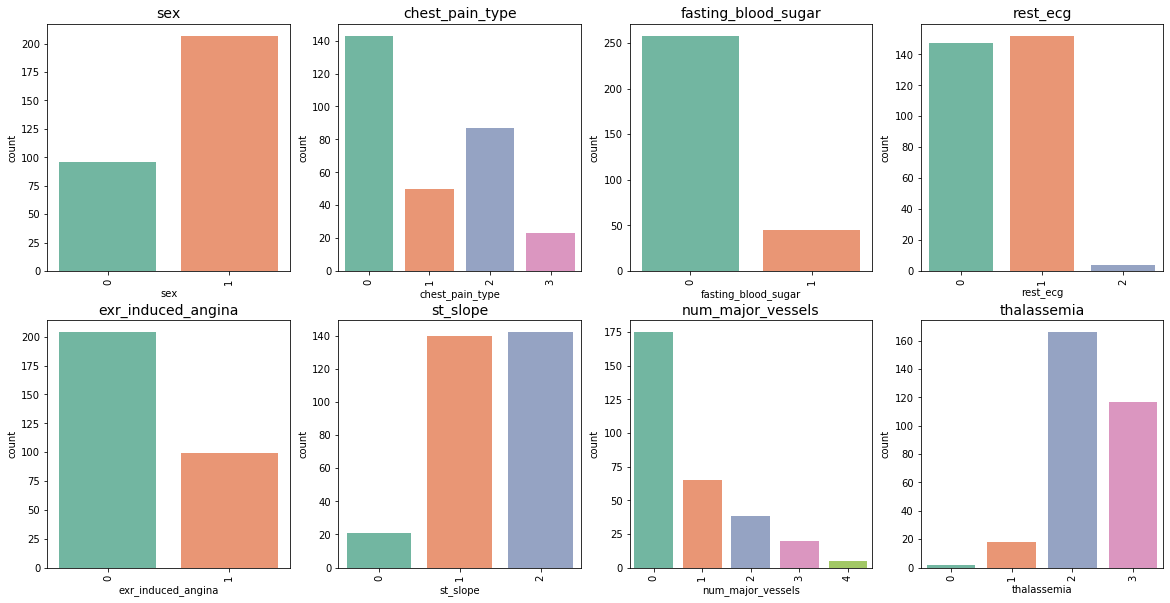

In [14]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cat_cols):
    plt.subplot(2,4, i+1)
    sns.countplot(data = df, x = col, palette = 'Set2')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

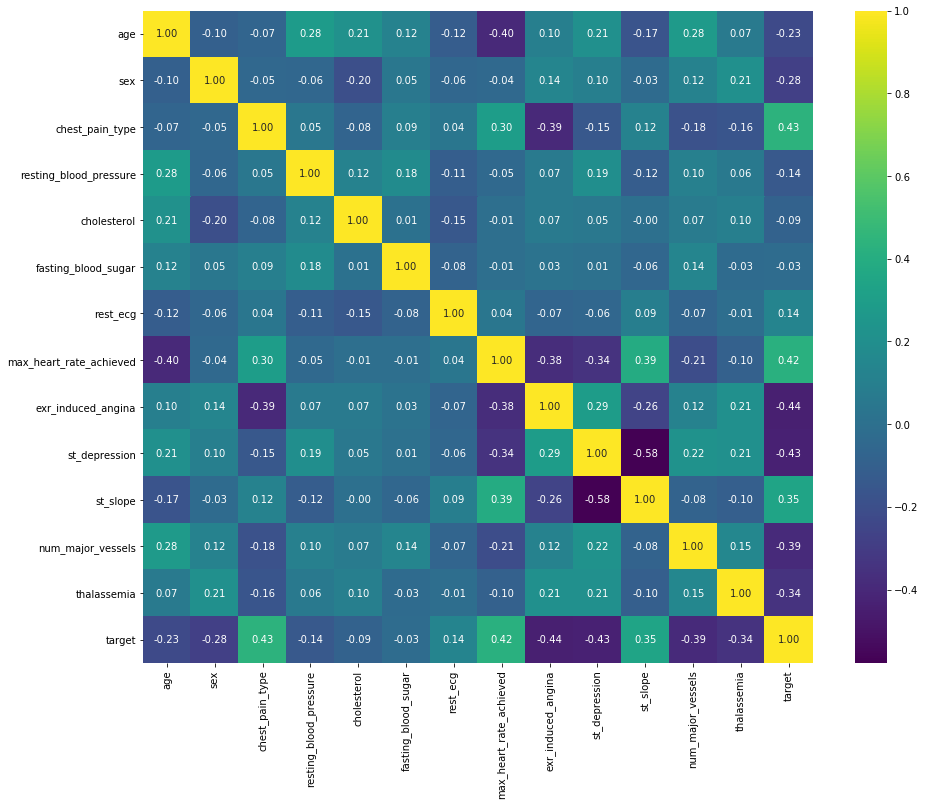

In [16]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis', cbar = True)

## Baseline Logistic Regression

In [19]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Accuracy score: 81.32 %


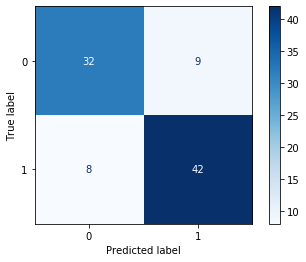

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(f'Accuracy score: {round(accuracy_score(y_test, pred) * 100, 2)} %')
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)